In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor
import seaborn as sns
import csv

Using TensorFlow backend.


In [2]:
df_train = pd.read_csv('./titanic/train.csv')

df_train.head()
# print(df_train.dtypes)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


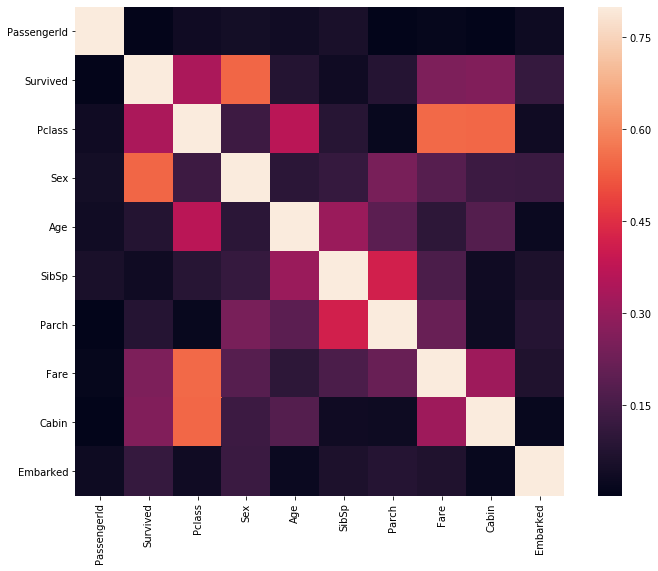

In [3]:
df_train["Sex"] = df_train["Sex"].apply(lambda x : 1 if x == "male" else 0)
# df_train.head()
def toNum(x):
    if x == 'S': return 1
    elif x == 'C': return 2
    else: return 3
df_train.Embarked = df_train.Embarked.apply(toNum)

def toNum1(x):
    if str(x) == 'nan': return 0
    else:
        for i in x:
            if ord(i) >= ord('A') and ord(i) <= ord('Z'):
                return ord(i) - ord('A')+1    
df_train.Cabin = df_train.Cabin.apply(toNum1)

# df_train = df_train.dropna()

corrmat = df_train.corr().abs()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
# print(df_train.dtypes)
# df_train.Survived = df_train.Survived.astype("category")
# df_train.Sex = df_train.Sex.astype("category")
# df_train.Embarked = df_train.Embarked.astype("category")
# df_train.Pclass = df_train.Pclass.astype("category")
# df_train.SibSp = df_train.SibSp.astype("category")
# df_train.Parch = df_train.Parch.astype("category")
# df_train.head()
# print(df_train.dtypes)

In [4]:
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = df_train[features]
Y = df_train.Survived

scale = StandardScaler()
X = scale.fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

import keras
Y_train = keras.utils.to_categorical(Y_train, 2)
Y_test = keras.utils.to_categorical(Y_test, 2)


In [10]:
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(256,input_dim =X_train.shape[1],activation = 'relu'))
# model.add(Dense(16,activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(2,activation='softmax'))
# model.summary()
# Compile model

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['binary_accuracy'])
model.fit(X_train, Y_train,batch_size=20,epochs=100,verbose=1,validation_data=(X_test, Y_test))



Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 0s 262us/step - loss: 0.6612 - binary_accuracy: 0.5787 - val_loss: 0.5934 - val_binary_accuracy: 0.6145
Epoch 2/100
712/712 [==============================] - 0s 65us/step - loss: 0.5825 - binary_accuracy: 0.6770 - val_loss: 0.5502 - val_binary_accuracy: 0.7151
Epoch 3/100
712/712 [==============================] - 0s 90us/step - loss: 0.5602 - binary_accuracy: 0.7275 - val_loss: 0.5231 - val_binary_accuracy: 0.7486
Epoch 4/100
712/712 [==============================] - 0s 114us/step - loss: 0.5278 - binary_accuracy: 0.7598 - val_loss: 0.5003 - val_binary_accuracy: 0.8156
Epoch 5/100
712/712 [==============================] - 0s 111us/step - loss: 0.5170 - binary_accuracy: 0.7795 - val_loss: 0.4866 - val_binary_accuracy: 0.8156
Epoch 6/100
712/712 [==============================] - 0s 90us/step - loss: 0.4955 - binary_accuracy: 0.7837 - val_loss: 0.4780 - val_binary_accuracy: 0.8212
Epo

712/712 [==============================] - 0s 104us/step - loss: 0.4420 - binary_accuracy: 0.7921 - val_loss: 0.4322 - val_binary_accuracy: 0.8212
Epoch 53/100
712/712 [==============================] - 0s 113us/step - loss: 0.4486 - binary_accuracy: 0.7935 - val_loss: 0.4314 - val_binary_accuracy: 0.8101
Epoch 54/100
712/712 [==============================] - 0s 97us/step - loss: 0.4447 - binary_accuracy: 0.7992 - val_loss: 0.4304 - val_binary_accuracy: 0.8268
Epoch 55/100
712/712 [==============================] - 0s 80us/step - loss: 0.4463 - binary_accuracy: 0.7879 - val_loss: 0.4301 - val_binary_accuracy: 0.8268
Epoch 56/100
712/712 [==============================] - 0s 103us/step - loss: 0.4362 - binary_accuracy: 0.7949 - val_loss: 0.4294 - val_binary_accuracy: 0.8324
Epoch 57/100
712/712 [==============================] - 0s 105us/step - loss: 0.4412 - binary_accuracy: 0.8062 - val_loss: 0.4272 - val_binary_accuracy: 0.8324
Epoch 58/100
712/712 [==============================] -

In [6]:
model.evaluate(X_test, Y_test)

179/179 [==============================] - 0s 47us/step


[0.45207602218542686, 0.826815664768219]

In [7]:
df_test = pd.read_csv('./titanic/test.csv')
df_test["Sex"] = df_test["Sex"].apply(lambda x : 1 if x == "male" else 0)
# df_test.head()
def toNum(x):
    if x == 'S': return 1
    elif x == 'C': return 2
    else: return 3
df_test.Embarked = df_test.Embarked.apply(toNum)

def toNum1(x):
    if str(x) == 'nan': return 0
    else:
        for i in x:
            if ord(i) >= ord('A') and ord(i) <= ord('Z'):
                return ord(i) - ord('A')+1    
df_test.Cabin = df_test.Cabin.apply(toNum1)


# print(df_test.dtypes)
# df_test.Sex = df_test.Sex.astype("category")
# df_test.Embarked = df_test.Embarked.astype("category")
# df_test.Pclass = df_test.Pclass.astype("category")
# df_test.SibSp = df_test.SibSp.astype("category")
# df_test.Parch = df_test.Parch.astype("category")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,3
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,1


In [8]:
# temp = pd.read_csv("./titanic/gender_submission.csv")
# temp.head()

X_t = scale.fit_transform(df_test[features])
test_pred = model.predict(X_t)

with open('./output.csv',mode='w') as TDP:
    wr = csv.writer(TDP) #, quoting=csv.QUOTE_ALL)
    wr.writerow(["PassengerId","Survived"])
    for i in range(len(test_pred)):
        a = 1
        if test_pred[i][0] >= test_pred[i][1] : a = 0
        wr.writerow([df_test.PassengerId[i],a])


In [9]:
temp = pd.read_csv("./output.csv")
temp.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
